# ANALYSIS 4 : 'BUNDLE' OR 'BOUGHT-TOGETHER' BASED ANALYSIS.
- Check for the popular bundle (quantity in a bundle).
- Top 10 Popular brands which sells Pack of 2 and 5, as they are the popular bundles.
- Top 10 Popular Sub-Category with Pack of 2 and 5.
- Checking for number of products the brand 'Rubie's Costume Co' has listed on Amazon since it has highest number of bundle in pack 2 and 5.
- Minimum, Maximum and Average Selling Price of prodcts sold by the Brand 'Rubie's Costume Co'.
- Top 10 Highest selling product in 'Clothing' Category for Brand 'Rubie's Costume Co'.
- Top 10 most viewed product for brand 'Rubie's Costume Co'.
-----------

Importing all the required Libraries

In [5]:
# importing all the required Libraries
import glob
import json
import csv
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import string
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import calendar
import collections
import warnings
warnings.filterwarnings("ignore")

Creating a path for product file 'ProductSample.json'.

In [8]:
# Creating a path for Review file i.e. input Data.
file=glob.glob('../Data/Tested_Data/ProductSample.json')

Cleaning of 'ProductSample.json' file and importing the data as pandas DataFrame.

In [9]:
# Reading a multiple json files from a single json file 'ProductSample.json'.
product=[]
with open(file[0]) as data_file:
    data=data_file.read()
    for i in data.split('\n'):
        product.append(i)        

# Firstly cleaning the data by converting files into proper json format files by some replacements and 
# then Making a list of Tuples containg all the data of json files.         
Combine=[]
for x in product:
    try:
        y=x.replace("'",'"')
        jdata=json.loads(y)
        Combine.append((jdata['asin'],jdata['related']['bought_together'],jdata['price'],jdata['related']['also_bought'],jdata['related']['also_viewed']))   
    except:
        pass  
    
# getting numerical values for 'Number_Of_Pack' and etc.
CombineValue=[]
for i in Combine:
        CombineValue.append((i[0],len(i[1])+1,i[2],len(i[3]),len(i[4])))
        
        
# Creating a dataframe using the list of Tuples got in the previous step.     
Pack_dataset=pd.DataFrame(CombineValue,columns=['Asin','Number_Of_Pack','Price','Also_Bought','Also_Viewed'])        

Displaying few rows of DataFrame 'Pack_dataset'

In [12]:
Pack_dataset.head()

,Asin,Number_Of_Pack,Price,Also_Bought,Also_Viewed
0,0000031887,2,6.79,95,59
1,0123456479,3,64.98,9,59
2,5555015097,5,22.95,8,20
3,5555014368,5,22.95,14,42
4,5555012322,3,22.95,71,59


# CHECK FOR THE POPULAR BUNDLE (i.e. QUANTITY IN A BUNDLE).

Grouping by Number of Pack and getting their respective count.

In [13]:
Pack_result=Pack_dataset.groupby('Number_Of_Pack')['Asin'].count().reset_index()

In [15]:
Pack_result=Pack_result.rename(columns={'Asin': 'Count'})
Pack_result

,Number_Of_Pack,Count
0,2,14281
1,3,9571
2,4,5541
3,5,23153


Bar plot for Number of Packs

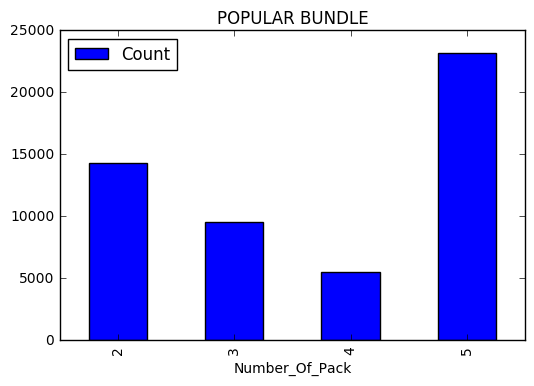

In [17]:
Pack_result.plot(x="Number_Of_Pack",y="Count",kind="bar",title="POPULAR BUNDLE")
plt.show()

Taking all the data to .csv file

In [18]:
Pack_result.to_csv('../Analysis/Analysis_4/Popular_Bundle.csv')

# TOP 10 POPULAR BRANDS WHICH SELLS PACK OF 2 AND PACK OF 5, AS THEY ARE THE POPULAR BUNDLES

Get all the asin for Pack 2 and 5 since they have the highest number of counts.

In [19]:
Pack2_5=Pack_dataset[(Pack_dataset.Number_Of_Pack == 2) | (Pack_dataset.Number_Of_Pack == 5)]
list_Pack2_5=Pack2_5.Asin.tolist()

Getting the brand name of those asin which is present in the list 'list_Pack2_5'.

In [20]:
pop_Brand=[]
for x in product:
    try:
        y=x.replace("'",'"')
        jdata=json.loads(y)
        if jdata['asin'] in list_Pack2_5:
            pop_Brand.append(jdata['brand'])  
    except:
        pass

Removing the rows which does not have brand name.

In [22]:
pop_Brand=list(filter(None, pop_Brand))

Counting the occurence of brand name and giving the top 10 brands.

In [23]:
Top10=collections.Counter(pop_Brand).most_common(10)

# creating a DataFrame
Top10_data=pd.DataFrame(Top10,columns=['Brand','No_Of_Pack_2_&_5'])

In [24]:
Top10_data.head()

,Brand,No_Of_Pack_2_&_5
0,Rubie&#39;s Costume Co,804
1,Forum Novelties,505
2,Rothco,236
3,Disguise Costumes,219
4,Unknown,198


Bar plot for Popular Brand based on Pack of 2 and 5

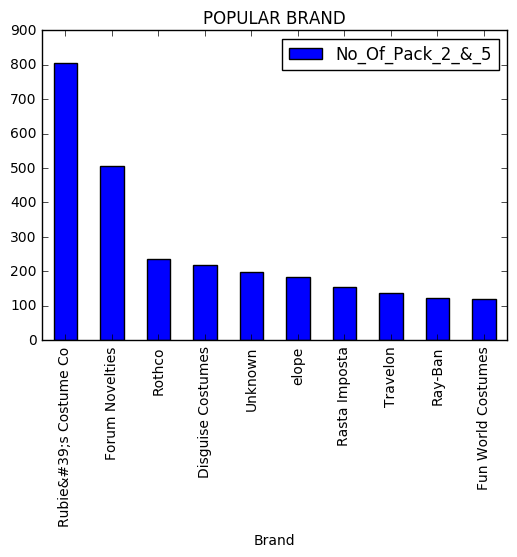

In [25]:
Top10_data.plot(x="Brand",y="No_Of_Pack_2_&_5",kind="bar",title="POPULAR BRAND")
plt.show()

Taking the data into .csv

In [26]:
Top10_data.to_csv('../Analysis/Analysis_4/Popular_Brand.csv')

# TOP 10 POPULAR SUB-CATEGORY WITH PACK OF 2 AND 5

Function to make multilevel list values flat.

In [27]:
# to make a multilevel list values flat
def make_flat(arr):
    res = []
    for l in arr:
        if isinstance(l, list):# or isinstance(l, collections.Iterable)
            res.extend(make_flat(l)) 
        else:
            res.append(l)
    return res

Getting the category of those asin which is present in the list 'list_Pack2_5'.

In [28]:
pop_Catg=[]
for x in product:
    try:
        y=x.replace("'",'"')
        jdata=json.loads(y)
        if jdata['asin'] in list_Pack2_5:
            pop_Catg.append(make_flat(jdata['categories']))  
    except:
        pass

Making the 'pop_Catg' multilevel list flat.

In [30]:
pop_Catg= make_flat(pop_Catg)

Counting the occurence of Sub-Category and giving the top 10 Sub-Category.

In [31]:
Top10Catg=collections.Counter(pop_Catg).most_common(11)
Top10Catg_data=pd.DataFrame(Top10Catg[1:],columns=['Sub-Category','No_Of_Pack_2_&_5'])

In [72]:
Top10Catg_data.head()

,Sub-Category,No_Of_Pack_2_&_5
0,Women,24574
1,"Novelty, Costumes & More",23947
2,Novelty,12656
3,Men,12252
4,Clothing,11938


# CHECKING FOR NUMBER OF PRODUCTS THE BRAND 'RUBIE'S COSTUME CO' HAS LISTED ON AMAZON SINCE IT HAS HIGHEST NUMBER OF BUNDLE IN PACK 2 AND 5

In [32]:
No_prod_brand=[]
brand_List=['Rubie&#39;s Costume Co']
for x in product:
    try:
        y=x.replace("'",'"')
        jdata=json.loads(y)
        if jdata['brand'] in brand_List:
            No_prod_brand.append((jdata['asin'],jdata['title'],jdata['price']))   
    except:
        pass 

In [33]:
brand_Prod=pd.DataFrame(No_prod_brand,columns=['Asin','Title','Price'])

In [34]:
Number_of_Products=brand_Prod.shape[0]

In [35]:
Number_of_Products

2175

# MINIMUM, MAXIMUM AND AVERAGE SELLING PRICE OF PRODCTS SOLD BY THE BRAND 'RUBIE'S COSTUME CO'.

Average Selling Price of Product Sold by 'RUBIE'S COSTUME CO'

In [37]:
Avg_SP=brand_Prod['Price'].mean()

In [38]:
Avg_SP

20.43500689655169

Minimum Selling Price of Product Sold by 'RUBIE'S COSTUME CO'

In [39]:
Min_SP=brand_Prod['Price'].min()

In [40]:
Min_SP

0.66000000000000003

Maximum Selling Price of Product Sold by 'RUBIE'S COSTUME CO'

In [41]:
Max_SP=brand_Prod['Price'].max()

In [42]:
Max_SP

783.01999999999998

# TOP 10 HIGHEST SELLING PRODUCT IN 'CLOTHING' CATEGORY FOR BRAND 'RUBIE'S COSTUME CO'

Taking all the Asin, SalesRank and etc. whose brand is 'RUBIE'S COSTUME CO'

In [43]:
rank_brand=[]
brand_List=['Rubie&#39;s Costume Co']
for x in product:
    try:
        y=x.replace("'",'"')
        jdata=json.loads(y)
        if jdata['brand'] in brand_List:
            rank_brand.append((jdata['asin'],jdata['title'],jdata['price'],jdata['salesRank']['Clothing']))   
    except:
        pass 

Creating a DataFrame

In [45]:
Rank_Gross=pd.DataFrame(rank_brand,columns=['Asin','Title','Price','SalesRank'])

Sorting DataFrame based on sales Rank.

In [46]:
TopGross=Rank_Gross.sort('SalesRank',ascending=True)

Taking data into .csv

In [54]:
TopGross.to_csv('../Analysis/Analysis_4/Popular_Product.csv')

In [56]:
TopGross.head()

,Asin,Title,Price,SalesRank
171,B000I1D0BC,DC Comics Boys Action Trio Superhero Costume Set,26.89,1532
1312,B0077GSZLG,The Dark Knight Rises Batman Child Costume Kit,9.20,3718
478,B001DNK0HQ,Star Wars Clone Wars Ahsoka Lightsaber,11.99,4226
649,B0029F1X0A,Star Trek The Next Generation Deluxe Shirt Cos...,21.66,4234
59,B000H1Y0V2,Kids Cop Belt,13.16,4965


#### Average Selling Price for top 10 products

In [58]:
TopGross.head(10)['Price'].mean()

12.267999999999999

Bar Plot for top 10 products based on SalesRank with its Price.  

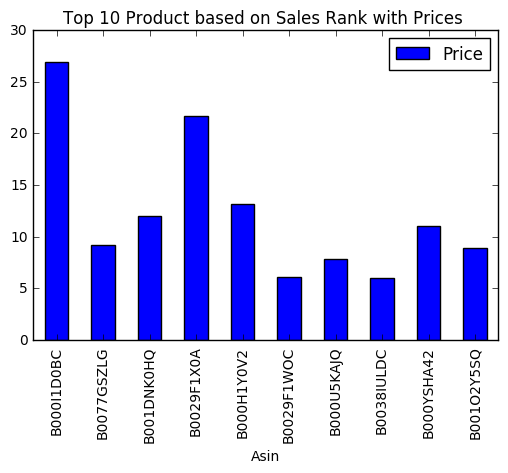

In [72]:
TopGross.head(10).plot(x="Asin",y="Price",kind="bar",title="Top 10 Product based on Sales Rank with Prices ")
plt.show()

# TOP 10 MOST VIEWED PRODUCT FOR BRAND 'RUBIE'S COSTUME CO'

From all the Asin getting all the Asin present in 'also_viewed' section of json file.

In [60]:
Viewed_prod_brand=[]
for x in product:
    try:
        y=x.replace("'",'"')
        jdata=json.loads(y)
        Viewed_prod_brand.append(jdata['related']['also_viewed'])   
    except:
        pass 
Viewed_prod_brand=make_flat(Viewed_prod_brand)    

Counting the Occurence of Asin for brand Rubie's Costume Co.

In [61]:
view_prod=collections.Counter(Viewed_prod_brand).most_common(len(set(Viewed_prod_brand)))

Creating a DataFrame with Asin and its Views.

In [62]:
view_prod_dataset=pd.DataFrame(view_prod,columns=['Asin','Views'])

Getting products of brand Rubie's Costume Co.

In [63]:
views=[]
x_ls=['Rubie&#39;s Costume Co']
for x in product:
    try:
        y=x.replace("'",'"')
        jdata=json.loads(y)
        if jdata['brand'] in x_ls:
            views.append((jdata['asin'],jdata['title'],jdata['price']))   
    except:
        pass 

In [64]:
views_dataset=pd.DataFrame(views,columns=['Asin','Title','Price'])

- Merging the 2 DataFrames 'views_dataset' and 'view_prod_dataset' such that only the Rubie's Costume Co. products from 'view_prod_dataset' gets mapped.
- Inner type merge was performed to get only mapped product with Rubie's Costume Co.

In [65]:
Most_Viewed=pd.merge(views_dataset,view_prod_dataset,on='Asin',how='inner')

Sorting the DataFrame

In [66]:
Most_Viewed=Most_Viewed.sort('Views',ascending=False)

In [67]:
Most_Viewed=Most_Viewed[['Asin','Title','Price']]

In [69]:
Most_Viewed.to_csv('../Analysis/Analysis_4/Most_Viewed_Product.csv')

In [70]:
Most_Viewed.head()

,Asin,Title,Price
65,B000H8GW2A,White Flapper Beads 60&quot; - Pearl Necklace,8.39
578,B004YARDMA,The Walking Dead Split Jaw Latex Mask,12.99
446,B003BW790I,Harry Potter Deluxe Glasses,5.03
153,B000ROE4JC,Plastic Roman Costume Sword (toy),7.99
364,B0029F1WOC,Star Trek Classic Spock Ears,6.10


#### Minimum Selling Price for top 10 Viewed products

In [71]:
Most_Viewed.head(10)['Price'].min()

4.9500000000000002

#### Maximum Selling Price for top 10 Viewed products

In [73]:
Most_Viewed.head(10)['Price'].max()

12.99

#### Average Selling Price for top 10 Viewed products

In [74]:
Most_Viewed.head(10)['Price'].mean()

7.241000000000001

Bar Plot for top 10 Viewed products with its Price.  

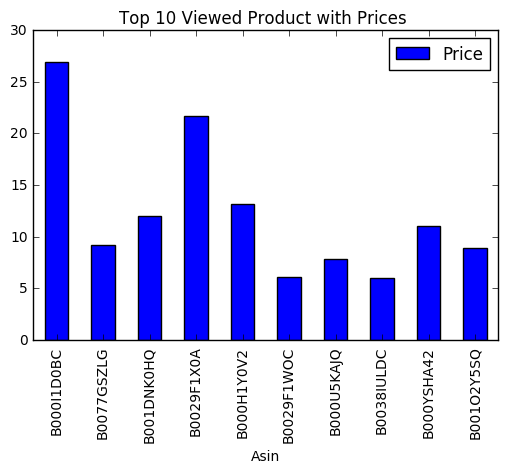

In [75]:
TopGross.head(10).plot(x="Asin",y="Price",kind="bar",title="Top 10 Viewed Product with Prices ")
plt.show()